In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
# 레티나 디스플레이 설정

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# 데이터 불러오기
titanic_data = pd.read_csv('./titanicData/train.csv')
df = pd.DataFrame(titanic_data)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
male_df = df[df['Sex'] == 'male']
female_df = df[df['Sex'] == 'female']

male_count = male_df['Sex'].count()
female_count = female_df['Sex'].count()

survive_male = male_df[male_df['Survived'] == 1]['Survived'].count()
survive_female = female_df[female_df['Survived'] == 1]['Survived'].count()

print('남성 중 생존한 승객 수:', survive_male)
print('여성 중 생존한 승객 수:', survive_female)

male_survived_ratio = survive_male / male_count
female_survived_ratio = survive_female / female_count

print('남성 생존률:', male_survived_ratio)
print('여성 생존률:', female_survived_ratio)

남성 중 생존한 승객 수: 109
여성 중 생존한 승객 수: 233
남성 생존률: 0.18890814558058924
여성 생존률: 0.7420382165605095


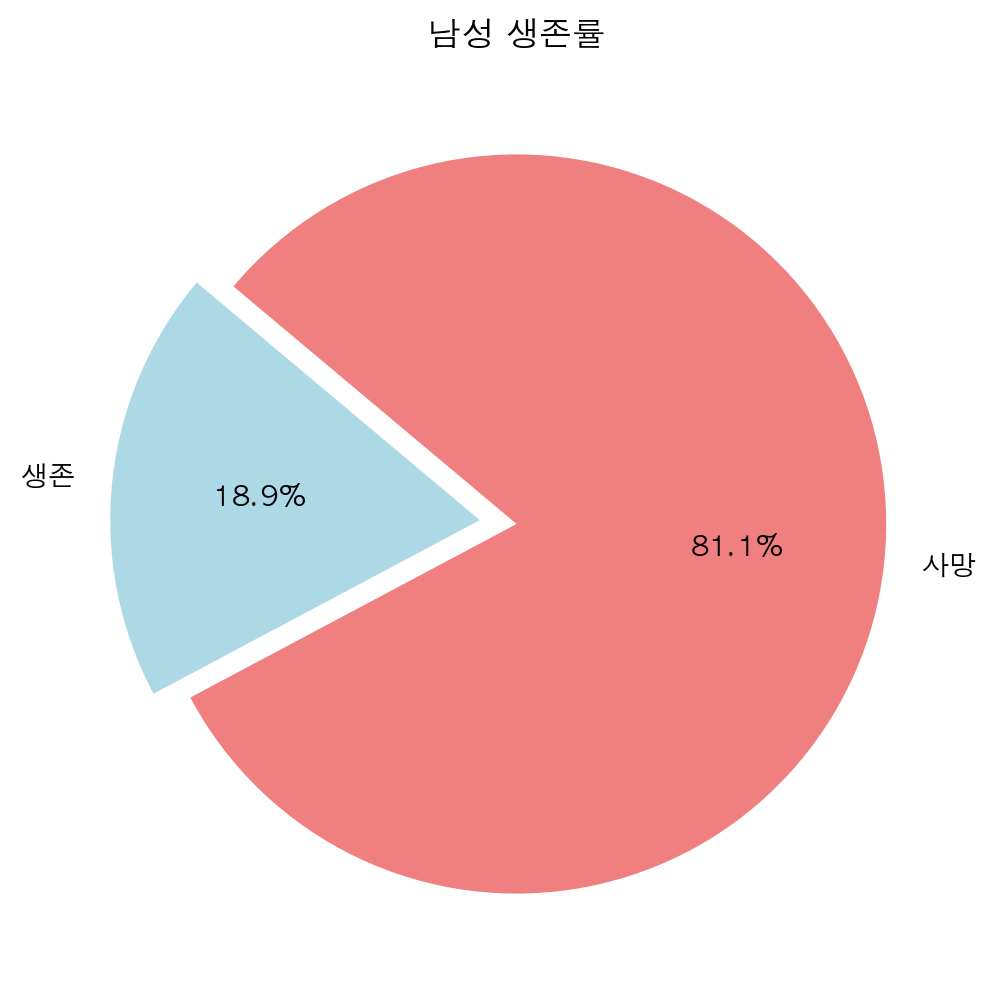

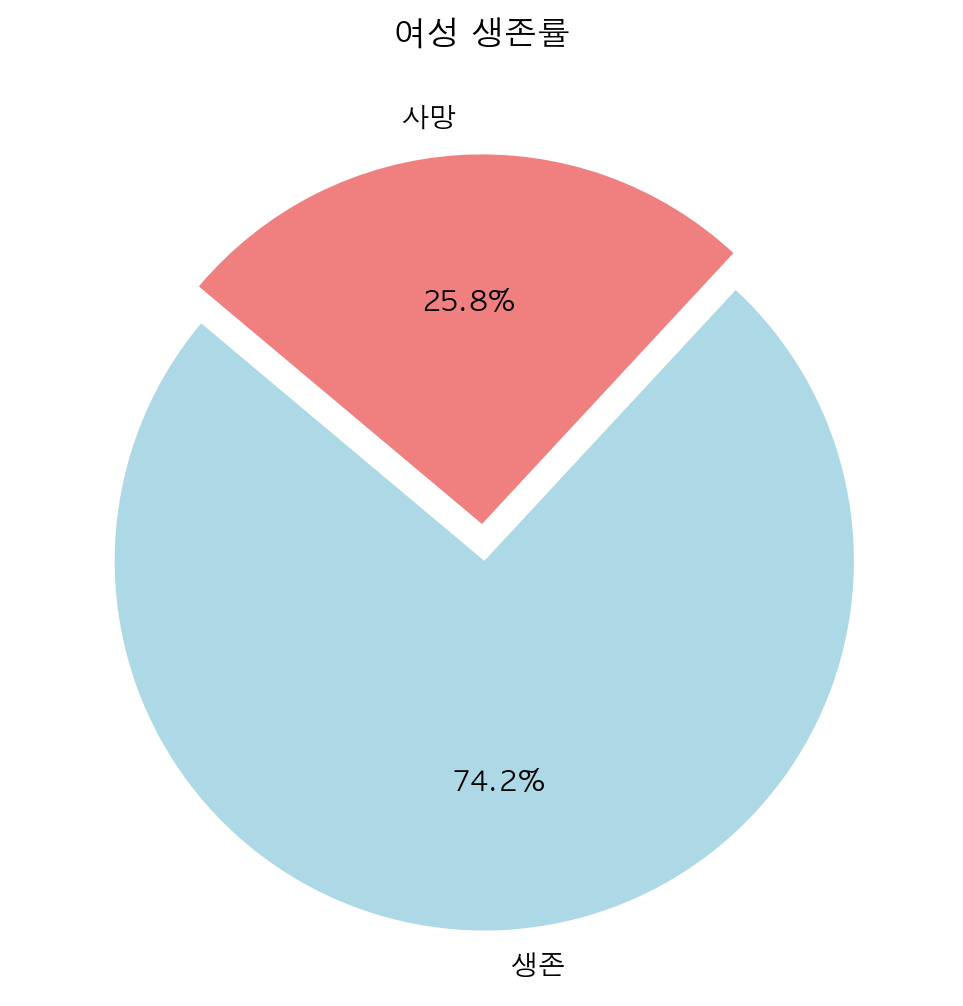

In [5]:
labels = ['생존', '사망']
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # 조각을 분리하여 강조

plt.figure(figsize=(6, 6))
plt.pie([male_survived_ratio, 1 - male_survived_ratio], labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('남성 생존률')

plt.show()

plt.figure(figsize=(6, 6))
plt.pie([female_survived_ratio, 1 - female_survived_ratio], labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('여성 생존률')

plt.show()

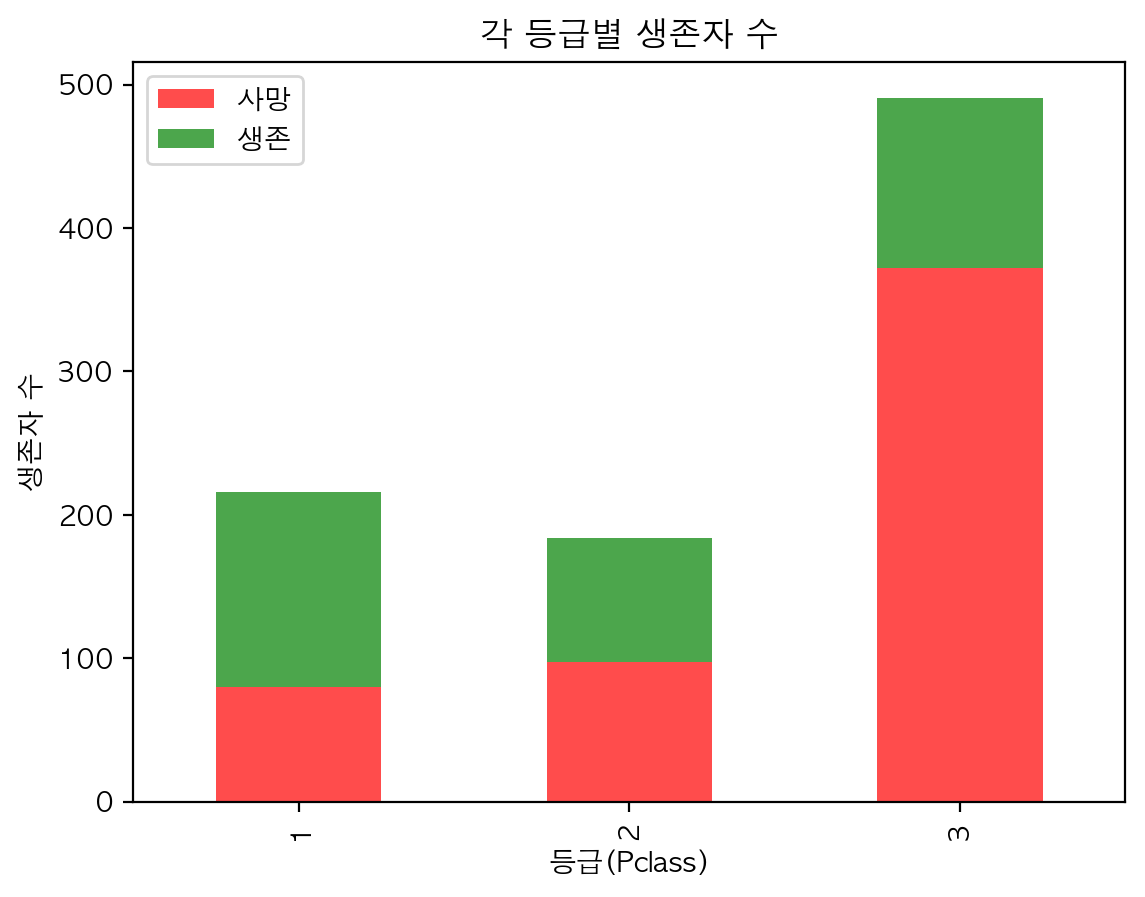

In [28]:
pClass_df = df.groupby('Pclass')['Survived'].value_counts().unstack()

pClass_df.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.7)

plt.xlabel('등급(Pclass)')
plt.ylabel('생존자 수')
plt.title('각 등급별 생존자 수')

plt.legend(['사망', '생존'])

plt.show()

In [18]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


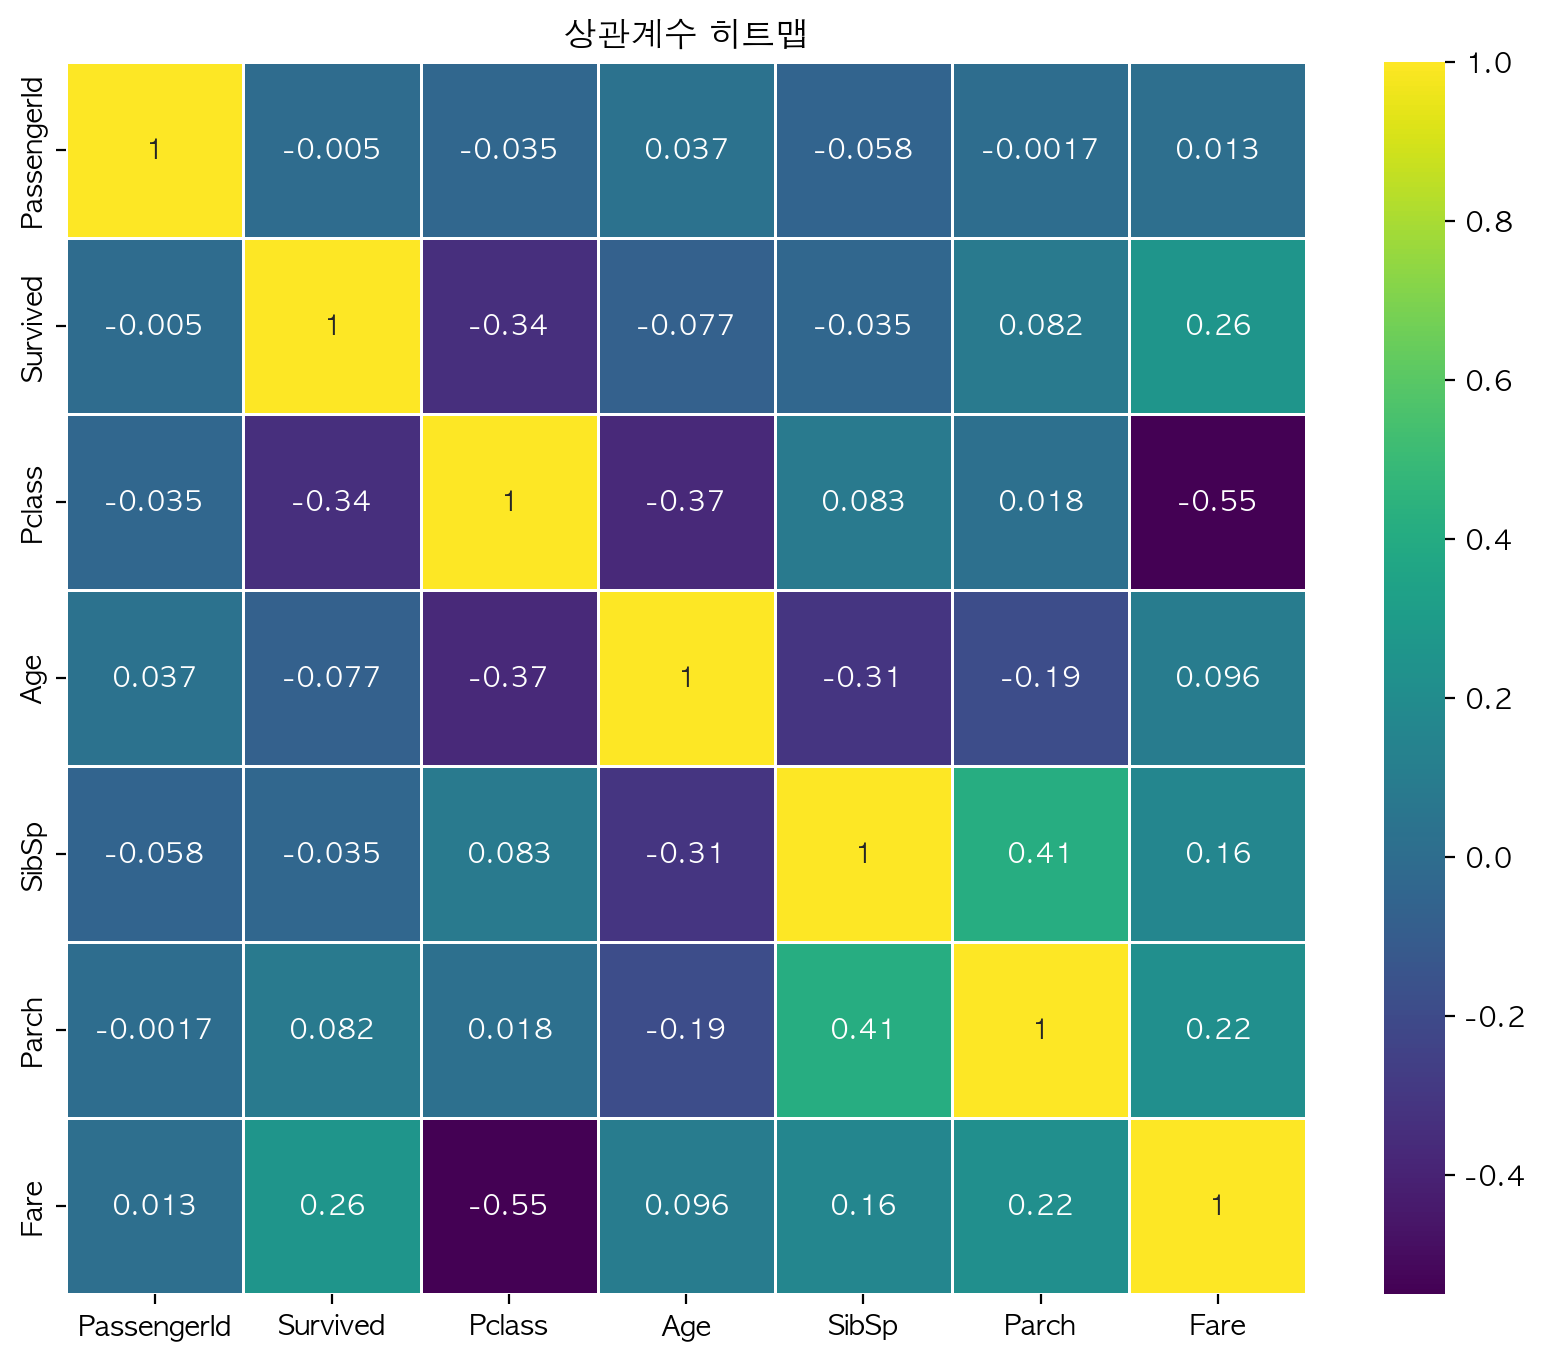

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('상관계수 히트맵')
plt.show()

/Users/park/miniconda3/envs/aiNoteBook/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/90/nhqnhqyn07v1sx9mn64ln2kc0000gn/T/ipykernel_1255/1329476003.py:3: UserWarning: The figure layout has changed to tight
  pC_S_plot.fig.tight_layout()


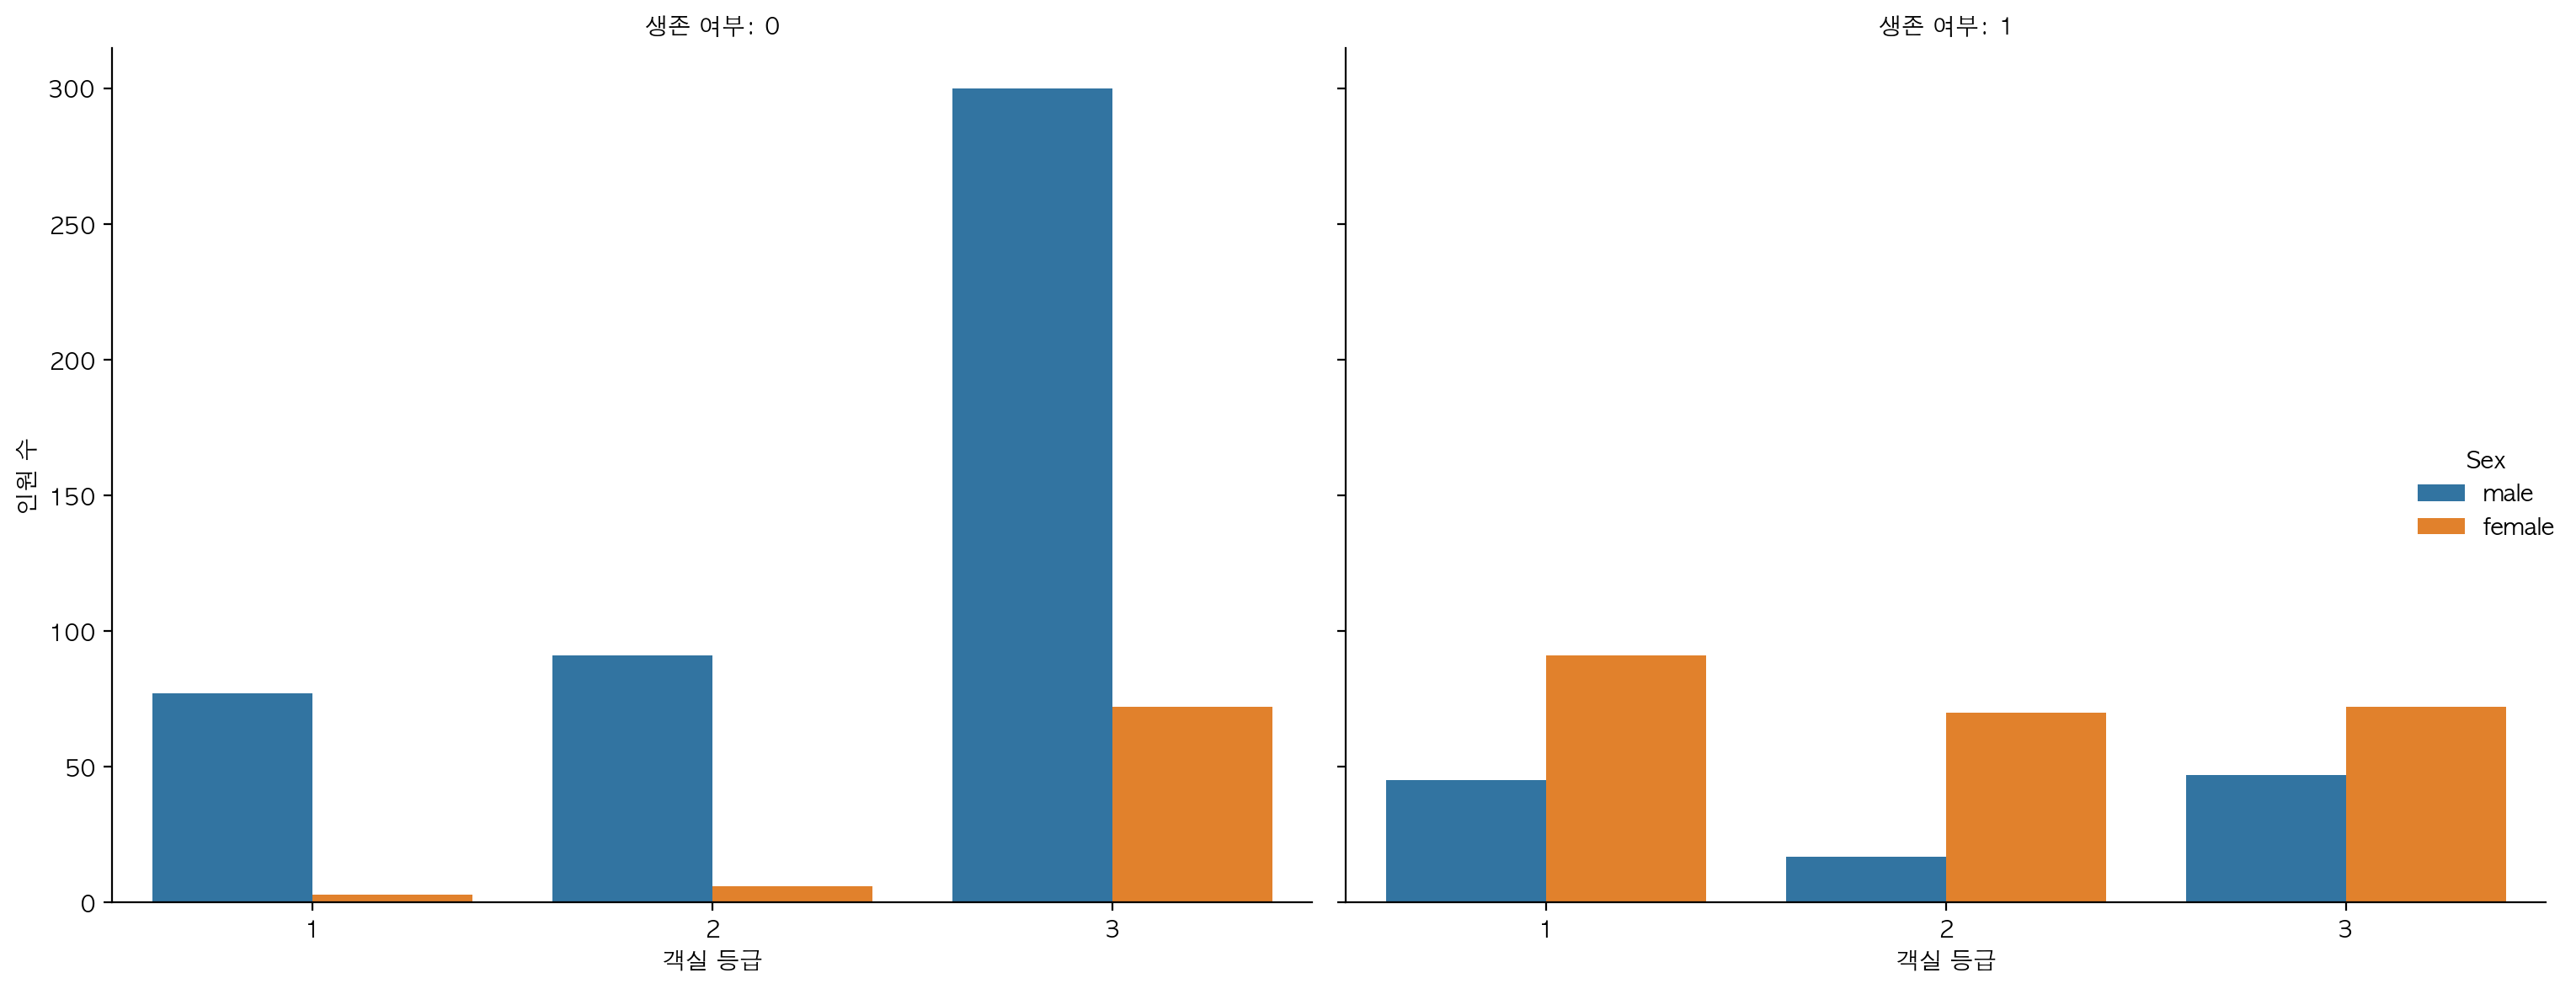

In [26]:
pC_S_plot = sns.catplot(x="Pclass", hue="Sex", col="Survived", data=df, kind="count", height=6, aspect=1.2)

pC_S_plot.fig.tight_layout()

pC_S_plot.set_axis_labels("객실 등급", "인원 수")
pC_S_plot.set_titles("생존 여부: {col_name}")

plt.show()